In [10]:
# Célula 1 — Preparar ambiente e carregar dados
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# criar pasta para salvar figuras/saídas
os.makedirs("data/outputs/figs", exist_ok=True)
os.makedirs("data/outputs/tables", exist_ok=True)

# carregar o arquivo tratado (antes do one-hot)
file_path = "data/processed/titanic_final.csv"
df = pd.read_csv(file_path)

print("Arquivo carregado:", file_path)
print("Dimensões:", df.shape)
display(df.head())


Arquivo carregado: data/processed/titanic_final.csv
Dimensões: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,14.4542,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [11]:
# Célula 2 — Estatísticas descritivas (resumo)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

summary = df[num_cols].agg(['count', 'mean', 'median', 'var', 'std', 'min', 'max']).T
summary = summary.rename(columns={'var':'variance', 'std':'std_dev', 'median':'median'})
display(summary)

# salvar tabela
summary.to_csv("data/outputs/tables/titanic/titanic_descriptive_stats.csv")
print("Resumo salvo em data/outputs/tables/titanic/titanic_descriptive_stats.csv")


,count,mean,median,variance,std_dev,min,max
PassengerId,891.0,446.000000,446.0000,66231.000000,257.353842,1.0,891.0
Survived,891.0,0.383838,0.0000,0.236772,0.486592,0.0,1.0
Pclass,891.0,2.308642,3.0000,0.699015,0.836071,1.0,3.0
Age,891.0,28.468013,28.0000,95.858245,9.790722,3.0,54.0
SibSp,891.0,0.297419,0.0000,0.272117,0.521648,0.0,2.0
Parch,891.0,0.000000,0.0000,0.000000,0.000000,0.0,0.0
Fare,891.0,17.383622,14.4542,161.620787,12.713016,0.0,65.0


Resumo salvo em data/outputs/tables/titanic/titanic_descriptive_stats.csv


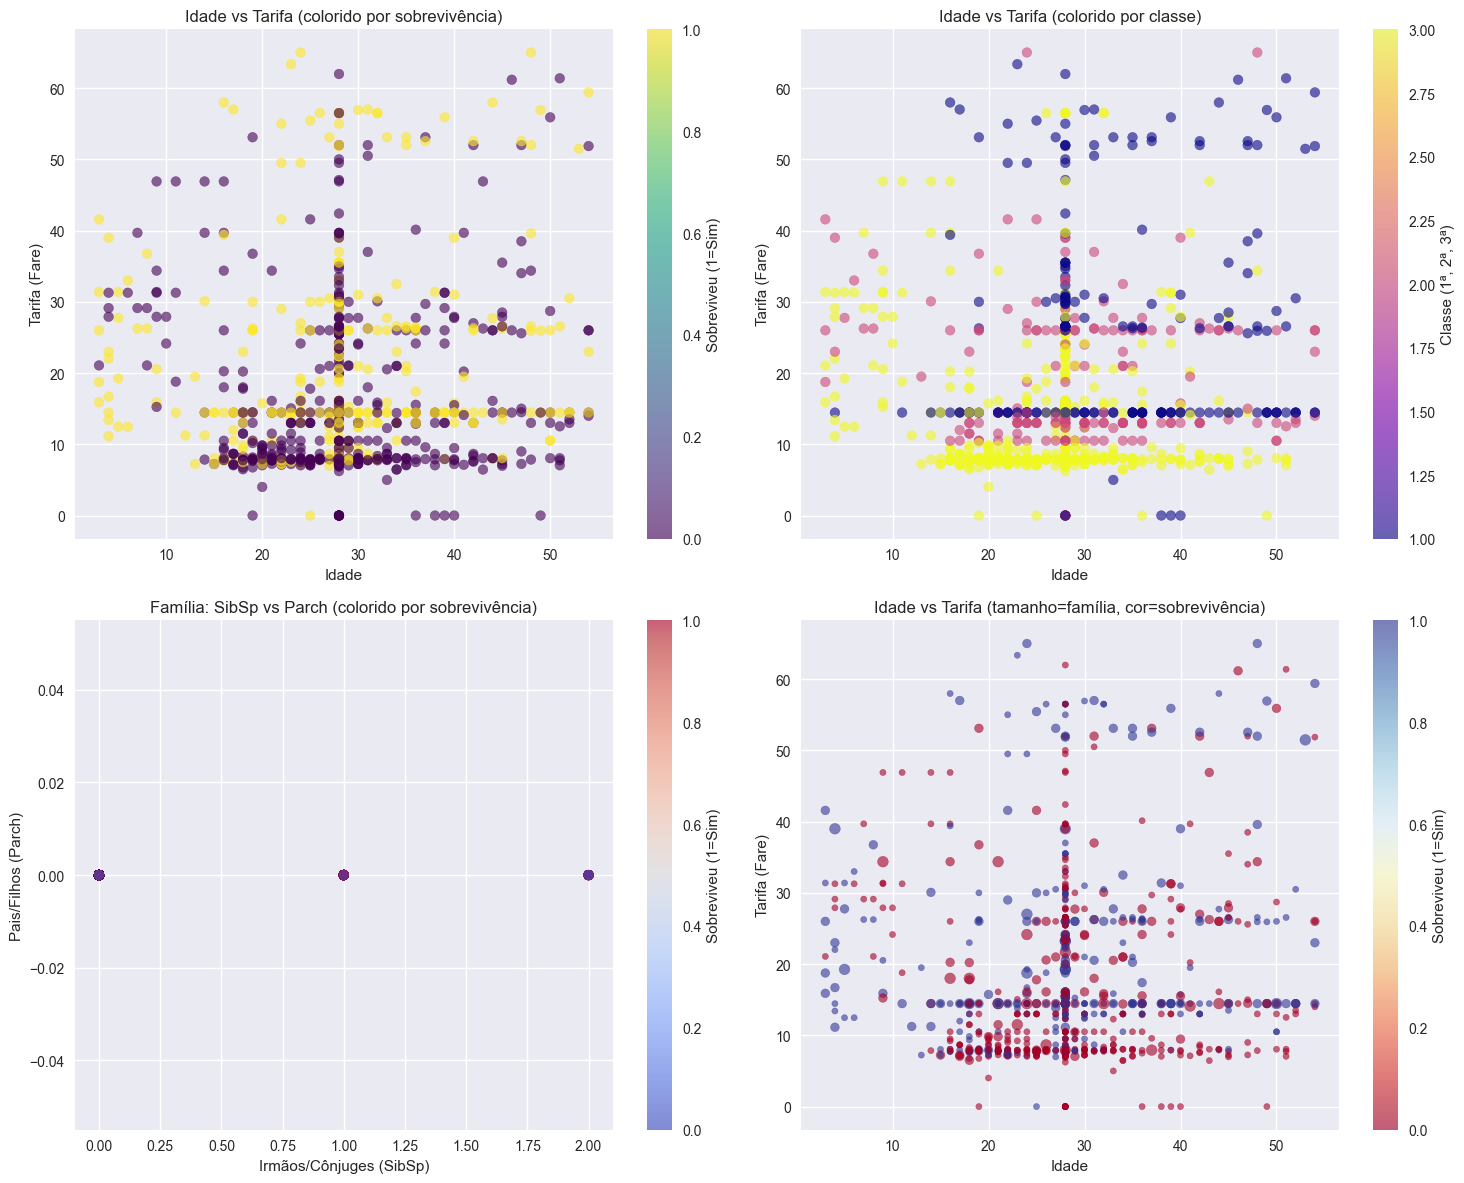

In [13]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# 1. GRÁFICOS DE DISPERSÃO 
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Idade vs Tarifa
scatter1 = axes[0,0].scatter(df['Age'], df['Fare'], c=df['Survived'], alpha=0.6, cmap='viridis')
axes[0,0].set_xlabel('Idade')
axes[0,0].set_ylabel('Tarifa (Fare)')
axes[0,0].set_title('Idade vs Tarifa (colorido por sobrevivência)')
plt.colorbar(scatter1, ax=axes[0,0], label='Sobreviveu (1=Sim)')

# Idade vs Tarifa
scatter2 = axes[0,1].scatter(df['Age'], df['Fare'], c=df['Pclass'], alpha=0.6, cmap='plasma')
axes[0,1].set_xlabel('Idade')
axes[0,1].set_ylabel('Tarifa (Fare)')
axes[0,1].set_title('Idade vs Tarifa (colorido por classe)')
plt.colorbar(scatter2, ax=axes[0,1], label='Classe (1ª, 2ª, 3ª)')

# SibSp vs Parch
scatter3 = axes[1,0].scatter(df['SibSp'], df['Parch'], c=df['Survived'], alpha=0.6, cmap='coolwarm')
axes[1,0].set_xlabel('Irmãos/Cônjuges (SibSp)')
axes[1,0].set_ylabel('Pais/Filhos (Parch)')
axes[1,0].set_title('Família: SibSp vs Parch (colorido por sobrevivência)')
plt.colorbar(scatter3, ax=axes[1,0], label='Sobreviveu (1=Sim)')

# Tarifa vs Idade
family_size = df['SibSp'] + df['Parch'] + 1 
scatter4 = axes[1,1].scatter(df['Age'], df['Fare'], s=family_size*20, c=df['Survived'], alpha=0.6, cmap='RdYlBu')
axes[1,1].set_xlabel('Idade')
axes[1,1].set_ylabel('Tarifa (Fare)')
axes[1,1].set_title('Idade vs Tarifa (tamanho=família, cor=sobrevivência)')
plt.colorbar(scatter4, ax=axes[1,1], label='Sobreviveu (1=Sim)')

plt.tight_layout()
plt.savefig('data/outputs/figs/titanic_scatter_plots.png', dpi=300, bbox_inches='tight')
plt.show()

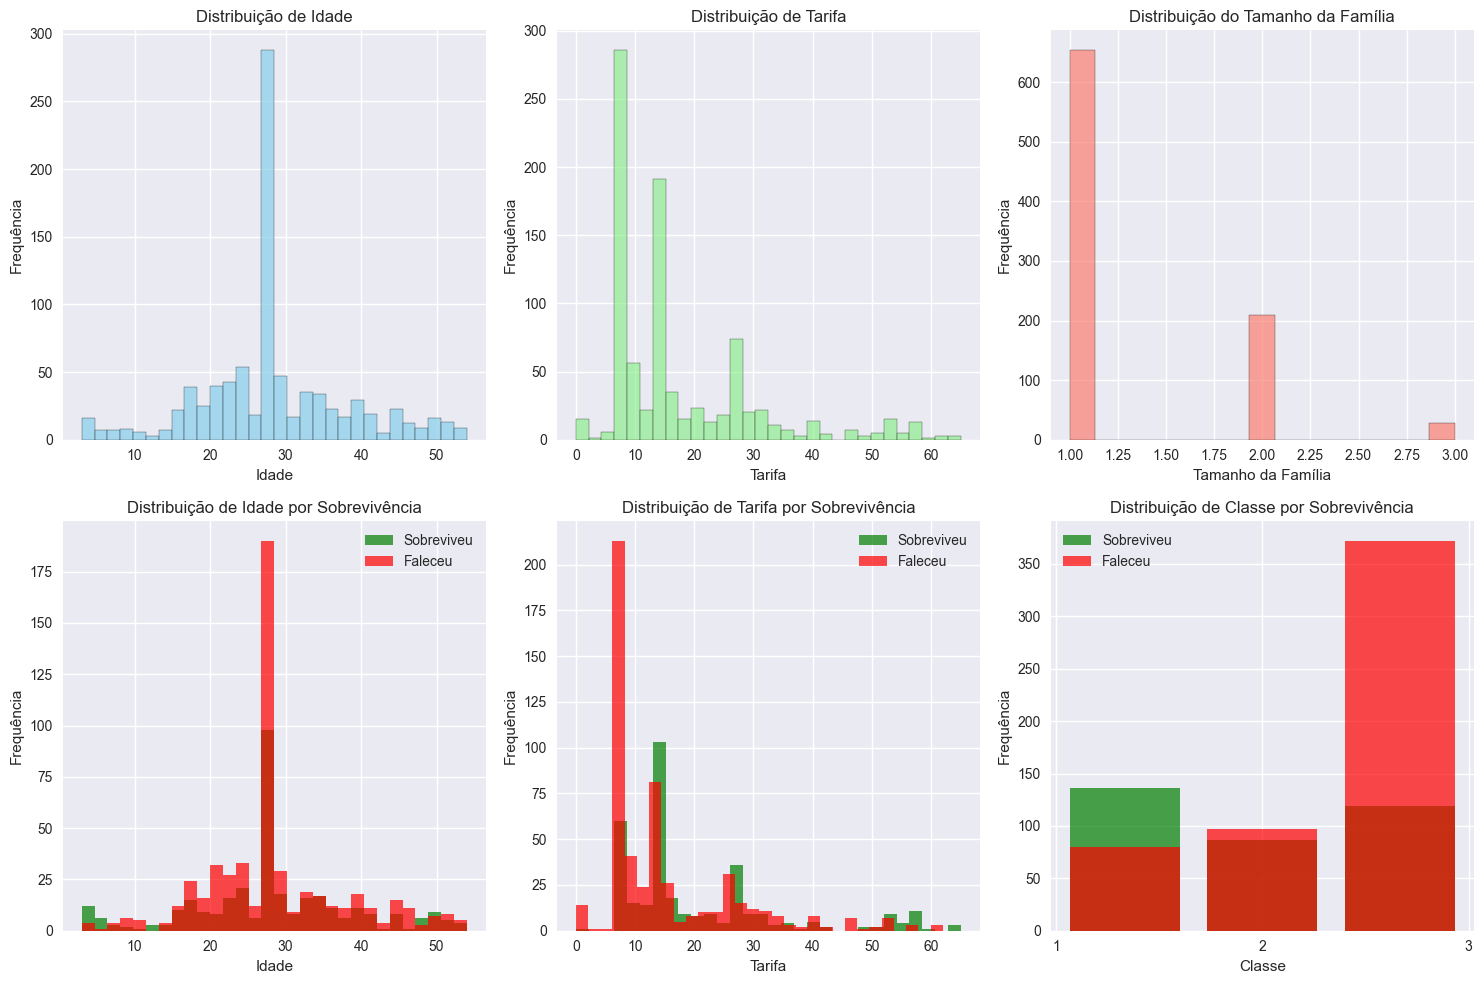

In [14]:
# 2. HISTOGRAMAS 
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Histograma de Idade
axes[0,0].hist(df['Age'].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_xlabel('Idade')
axes[0,0].set_ylabel('Frequência')
axes[0,0].set_title('Distribuição de Idade')

# Histograma de Tarifa
axes[0,1].hist(df['Fare'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_xlabel('Tarifa')
axes[0,1].set_ylabel('Frequência')
axes[0,1].set_title('Distribuição de Tarifa')

# Histograma de Tamanho da Família
axes[0,2].hist(family_size, bins=15, alpha=0.7, color='salmon', edgecolor='black')
axes[0,2].set_xlabel('Tamanho da Família')
axes[0,2].set_ylabel('Frequência')
axes[0,2].set_title('Distribuição do Tamanho da Família')

# Histogramas comparativos de idade por sobrevivência
df_survived = df[df['Survived'] == 1]
df_died = df[df['Survived'] == 0]

axes[1,0].hist(df_survived['Age'].dropna(), bins=30, alpha=0.7, label='Sobreviveu', color='green')
axes[1,0].hist(df_died['Age'].dropna(), bins=30, alpha=0.7, label='Faleceu', color='red')
axes[1,0].set_xlabel('Idade')
axes[1,0].set_ylabel('Frequência')
axes[1,0].set_title('Distribuição de Idade por Sobrevivência')
axes[1,0].legend()

# Histogramas comparativos de tarifa por sobrevivência
axes[1,1].hist(df_survived['Fare'], bins=30, alpha=0.7, label='Sobreviveu', color='green')
axes[1,1].hist(df_died['Fare'], bins=30, alpha=0.7, label='Faleceu', color='red')
axes[1,1].set_xlabel('Tarifa')
axes[1,1].set_ylabel('Frequência')
axes[1,1].set_title('Distribuição de Tarifa por Sobrevivência')
axes[1,1].legend()

# Histogramas comparativos de classe por sobrevivência
axes[1,2].hist(df_survived['Pclass'], bins=3, alpha=0.7, label='Sobreviveu', color='green', rwidth=0.8)
axes[1,2].hist(df_died['Pclass'], bins=3, alpha=0.7, label='Faleceu', color='red', rwidth=0.8)
axes[1,2].set_xlabel('Classe')
axes[1,2].set_ylabel('Frequência')
axes[1,2].set_title('Distribuição de Classe por Sobrevivência')
axes[1,2].legend()
axes[1,2].set_xticks([1, 2, 3])

plt.tight_layout()
plt.savefig('data/outputs/figs/titanic_histograms.png', dpi=300, bbox_inches='tight')
plt.show()

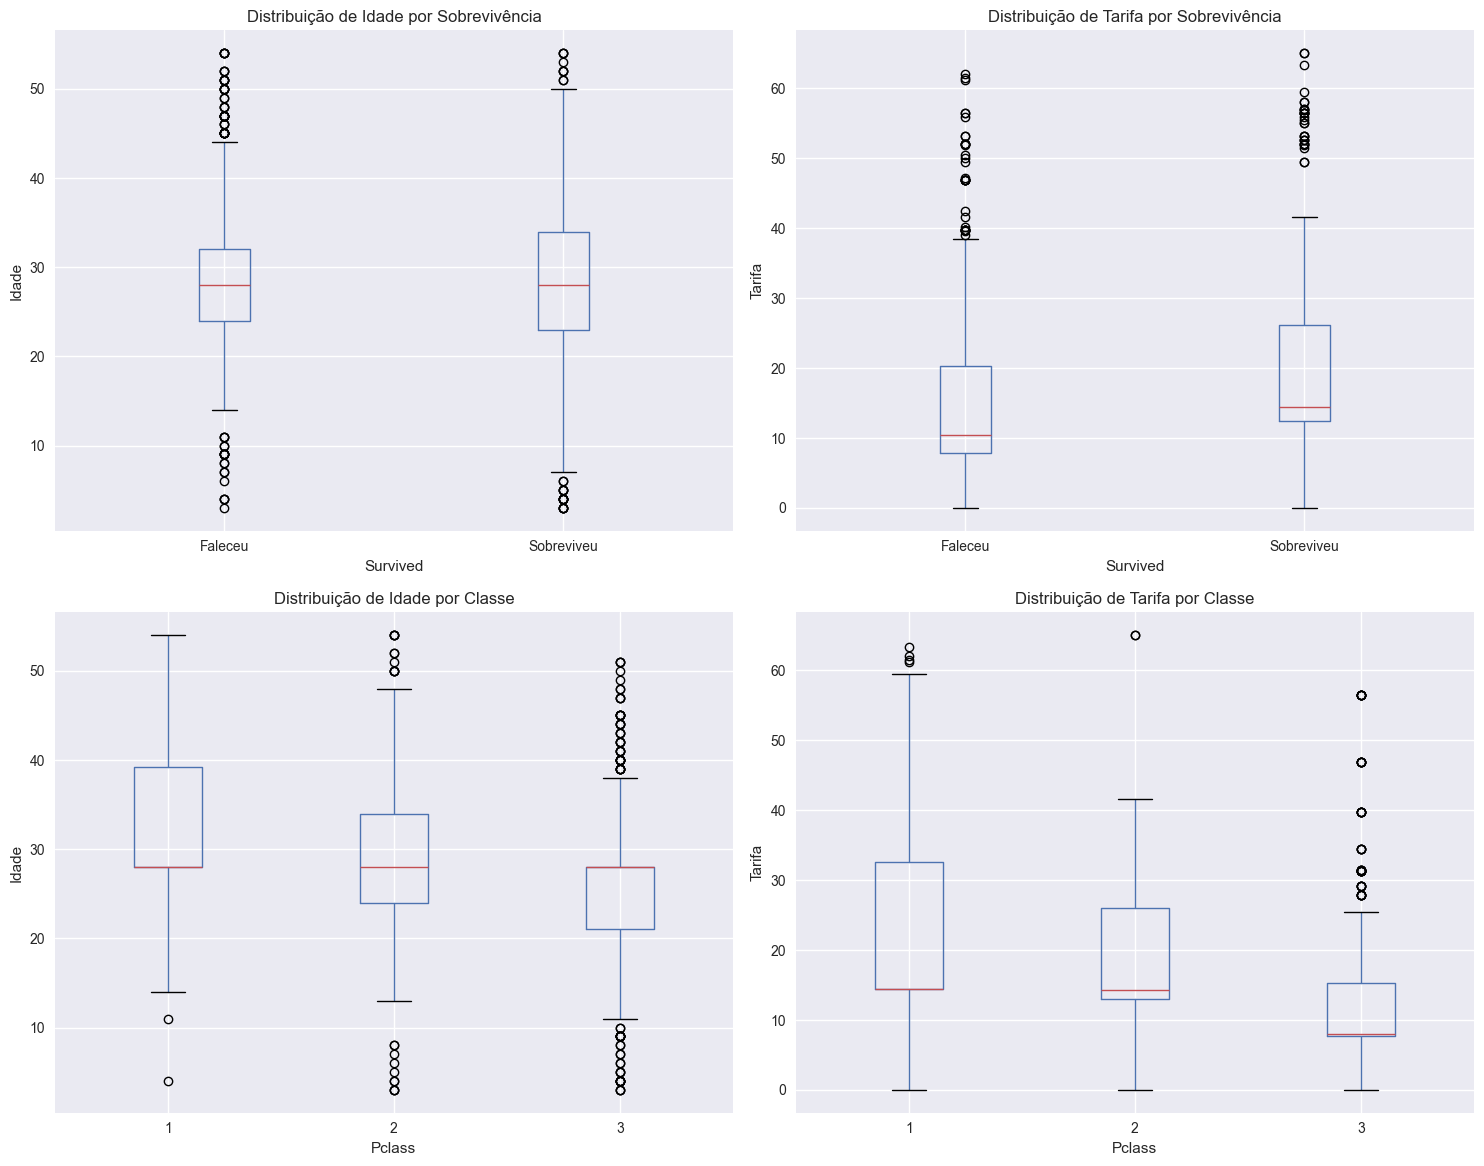

In [16]:
# 3. BOXPLOTS 
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Boxplot de Idade por Sobrevivência
df.boxplot(column='Age', by='Survived', ax=axes[0,0])
axes[0,0].set_title('Distribuição de Idade por Sobrevivência')
axes[0,0].set_ylabel('Idade')
axes[0,0].set_xticklabels(['Faleceu', 'Sobreviveu'])

# Boxplot de Tarifa por Sobrevivência
df.boxplot(column='Fare', by='Survived', ax=axes[0,1])
axes[0,1].set_title('Distribuição de Tarifa por Sobrevivência')
axes[0,1].set_ylabel('Tarifa')
axes[0,1].set_xticklabels(['Faleceu', 'Sobreviveu'])

# Boxplot de Idade por Classe
df.boxplot(column='Age', by='Pclass', ax=axes[1,0])
axes[1,0].set_title('Distribuição de Idade por Classe')
axes[1,0].set_ylabel('Idade')

# Boxplot de Tarifa por Classe
df.boxplot(column='Fare', by='Pclass', ax=axes[1,1])
axes[1,1].set_title('Distribuição de Tarifa por Classe')
axes[1,1].set_ylabel('Tarifa')

plt.suptitle('')  
plt.tight_layout()
plt.savefig('data/outputs/figs/titanic_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()


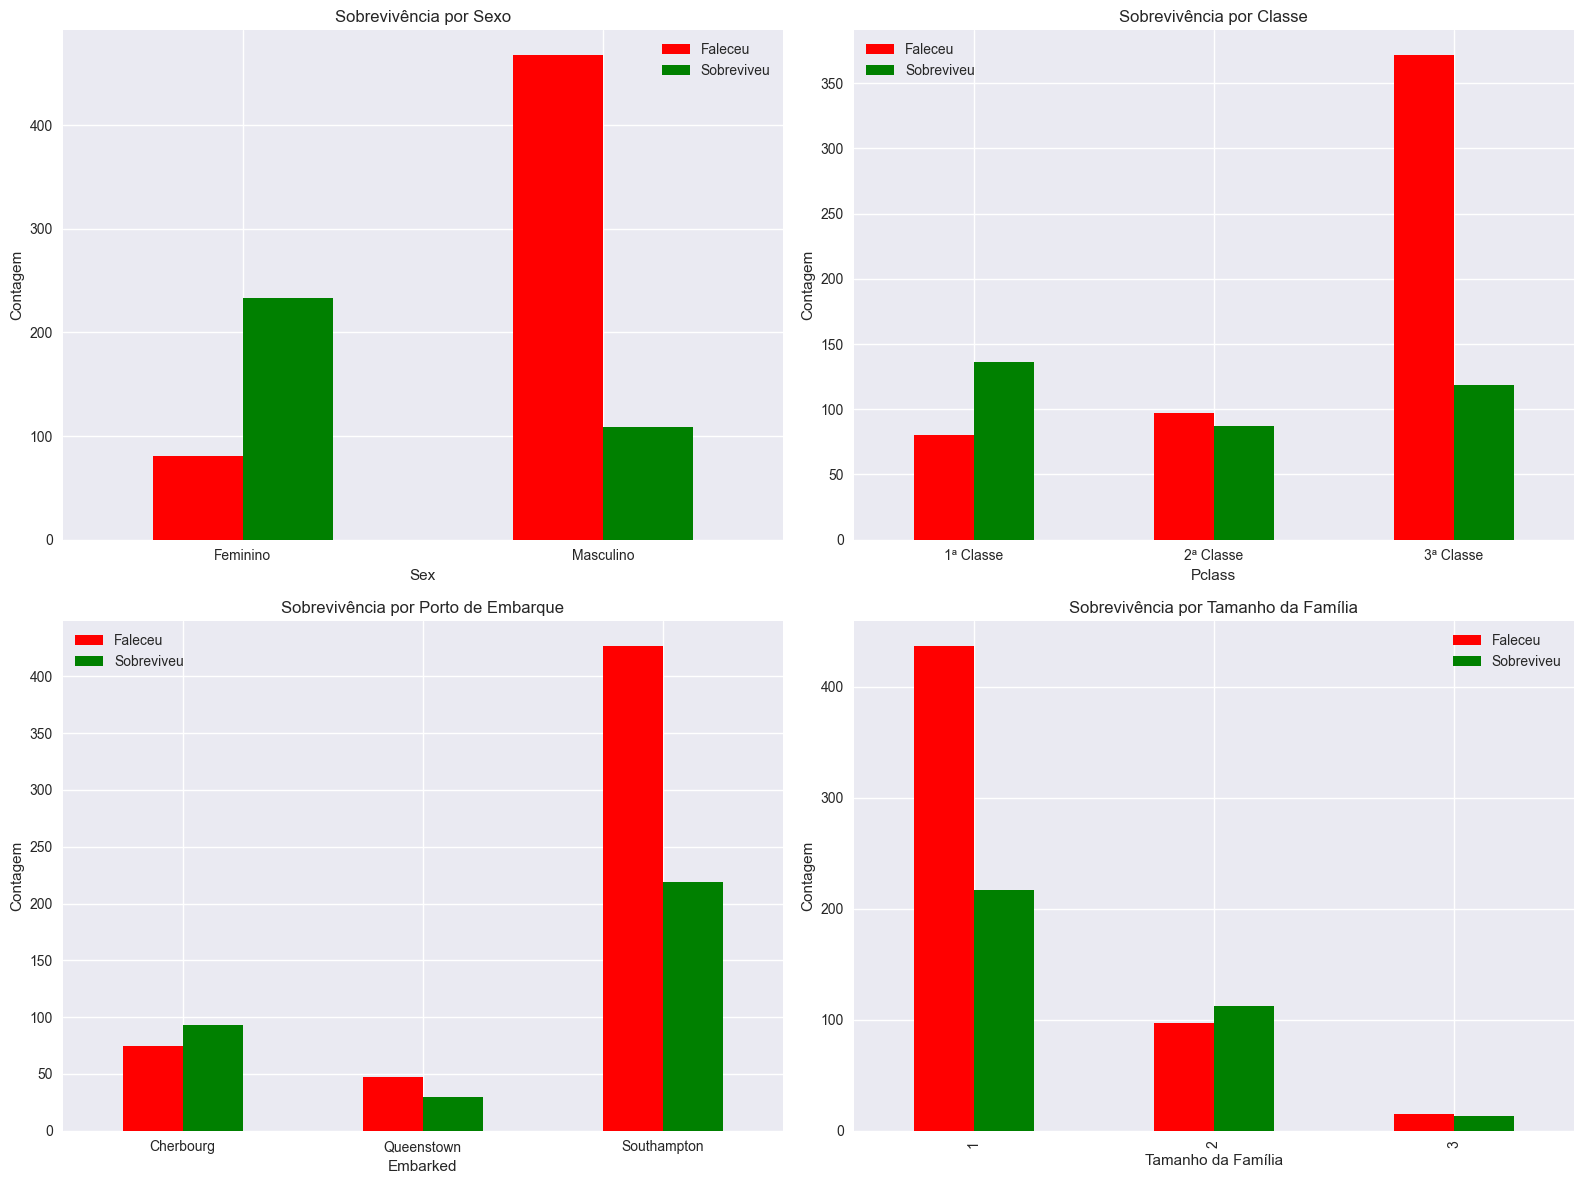

In [17]:
# 4. GRÁFICOS DE BARRAS AGRUPADAS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Sobrevivência por Sexo
gender_survival = pd.crosstab(df['Sex'], df['Survived'])
gender_survival.plot(kind='bar', ax=axes[0,0], color=['red', 'green'])
axes[0,0].set_title('Sobrevivência por Sexo')
axes[0,0].set_ylabel('Contagem')
axes[0,0].set_xticklabels(['Feminino', 'Masculino'], rotation=0)
axes[0,0].legend(['Faleceu', 'Sobreviveu'])

# Sobrevivência por Classe
class_survival = pd.crosstab(df['Pclass'], df['Survived'])
class_survival.plot(kind='bar', ax=axes[0,1], color=['red', 'green'])
axes[0,1].set_title('Sobrevivência por Classe')
axes[0,1].set_ylabel('Contagem')
axes[0,1].set_xticklabels(['1ª Classe', '2ª Classe', '3ª Classe'], rotation=0)
axes[0,1].legend(['Faleceu', 'Sobreviveu'])

# Sobrevivência por Porto de Embarque
embarked_survival = pd.crosstab(df['Embarked'], df['Survived'])
embarked_survival.plot(kind='bar', ax=axes[1,0], color=['red', 'green'])
axes[1,0].set_title('Sobrevivência por Porto de Embarque')
axes[1,0].set_ylabel('Contagem')
axes[1,0].set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'], rotation=0)
axes[1,0].legend(['Faleceu', 'Sobreviveu'])

# Sobrevivência por Tamanho da Família
family_survival = pd.crosstab(family_size, df['Survived'])
family_survival.plot(kind='bar', ax=axes[1,1], color=['red', 'green'])
axes[1,1].set_title('Sobrevivência por Tamanho da Família')
axes[1,1].set_ylabel('Contagem')
axes[1,1].set_xlabel('Tamanho da Família')
axes[1,1].legend(['Faleceu', 'Sobreviveu'])

plt.tight_layout()
plt.savefig('data/outputs/figs/titanic_grouped_bar_charts.png', dpi=300, bbox_inches='tight')
plt.show()


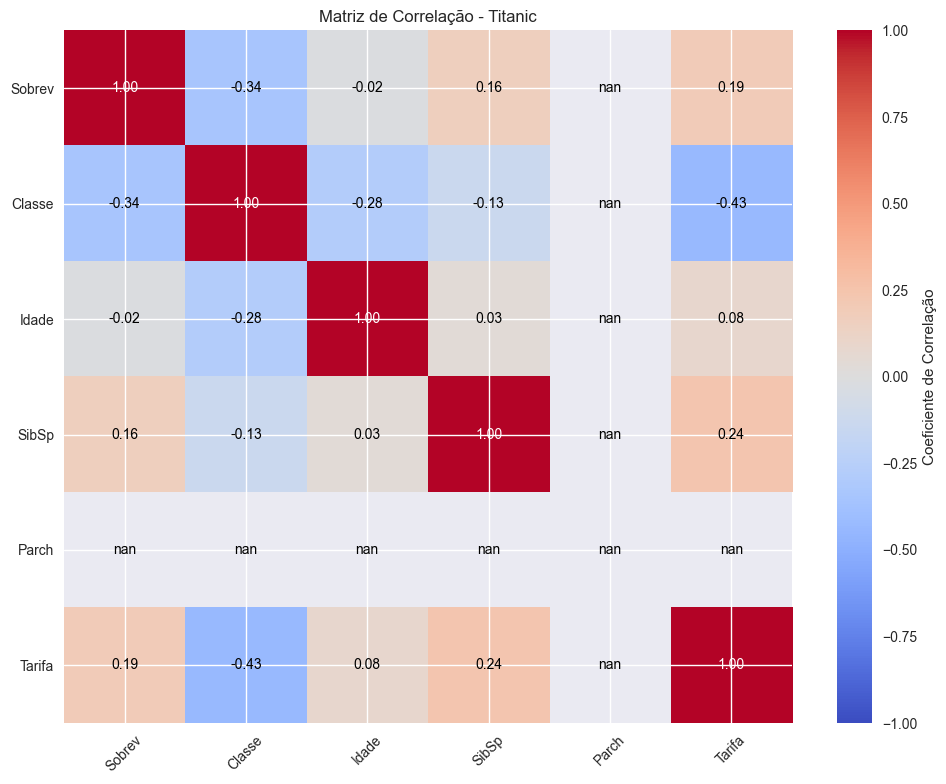

In [18]:
# 5. MATRIZ DE CORRELAÇÃO 
correlation_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()

plt.figure(figsize=(10, 8))
heatmap = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(heatmap, label='Coeficiente de Correlação')
plt.xticks(range(6), ['Sobrev', 'Classe', 'Idade', 'SibSp', 'Parch', 'Tarifa'], rotation=45)
plt.yticks(range(6), ['Sobrev', 'Classe', 'Idade', 'SibSp', 'Parch', 'Tarifa'])
plt.title('Matriz de Correlação - Titanic')

# Adicionar valores de correlação
for i in range(6):
    for j in range(6):
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', fontsize=10, 
                color='white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.savefig('data/outputs/figs/titanic_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()